The best regression model to predict the price of a house using the provided data is the Ridge regression model. As house pricing are the most frequently dataset that uses linear regression to predict, OLS, Lasso, Ridge, and Elastic Net were applied. Mean square error represent the average prediction error models make compare to the actual outcome. Among all models, Ridge regression model has the leaset MSE which is 200745.37, therefore Ridge model is the most accurate model in predicting the house price. 

The model perfroms best when predictin house price within 1 million, moderate accuracy between 1 to 2 millions as the prediction and actually house price scatter plot shows. Chosen indepent vatiables inculdes sqft of living area, grade of the property, number of bedrooms, wether ot has a waterfront and a dummy variable newly created by sepreate houses by their latitude. As we explore, we visualized that high priced houses are mainly located at upper King Country city. The regression model has a r and adjusted r square of 0.663 which means 66.3 percent of the variance in house price is explained by the above indicators. 
The coefficient of the model shows on average, each square foot increase in living space will increase the pricing by 198.89 dollars, one degree increase in grade would increase 75370 dollars. For each increase of number of bedroom, the price is negativly impacted by 28220 dollars, in realty large sqft_living tends to have higher number of bedrooms, therefore, houses with more bedrooms is not recommendate. Whether the property has a waterfonr and is it's latitude above 47.5 indicates if it is a high-end property. Therefore, waterfront and latitude dummy each has a impace of 812800 dollars and 231600 impact on pricing.  

In [66]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [67]:
house=pd.read_csv(r'https://raw.githubusercontent.com/CodyDong/schulich_data_science/main/Dataset/kc_house_data.csv')

In [68]:
house.info()
house.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Looking for outliers

<Axes: ylabel='bedrooms'>

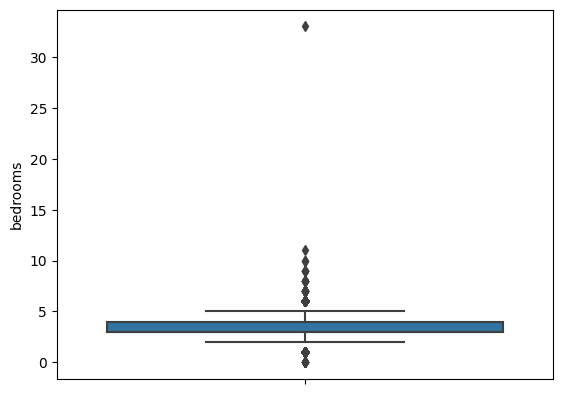

In [70]:
sns.boxplot(data=house,y='bedrooms')

<Axes: ylabel='bathrooms'>

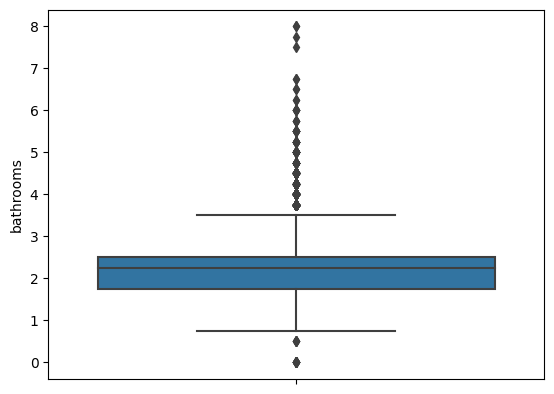

In [71]:
sns.boxplot(data=house,y='bathrooms')

<Axes: ylabel='sqft_living'>

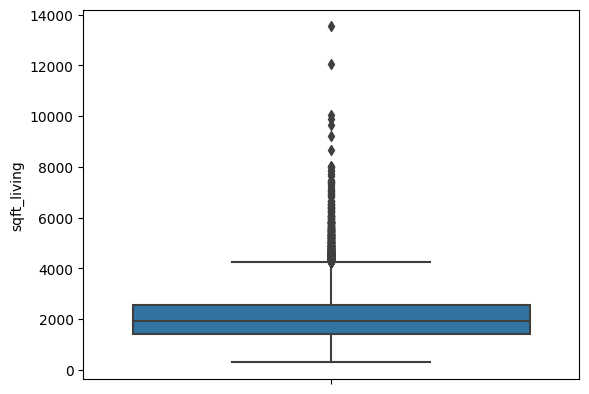

In [72]:
sns.boxplot(data=house,y='sqft_living')

<Axes: ylabel='price'>

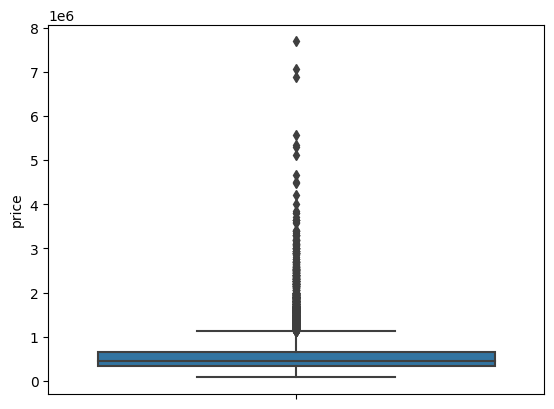

In [73]:
sns.boxplot(data=house,y='price')

Data exploratory potential relationship between potential columns and the predictive value, the Price

<Axes: xlabel='sqft_living', ylabel='price'>

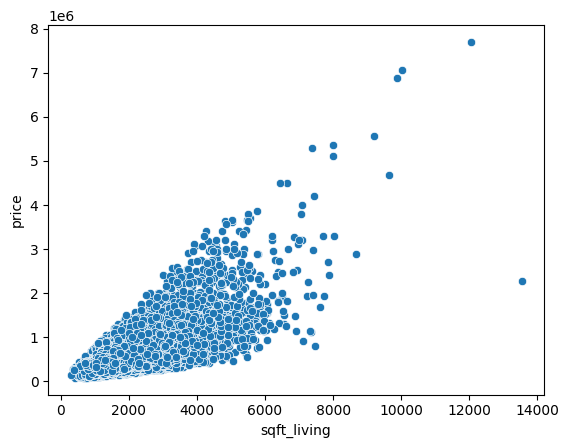

In [74]:
sns.scatterplot(data= house, y= 'price',x='sqft_living')

(750000.0, 8000000.0)

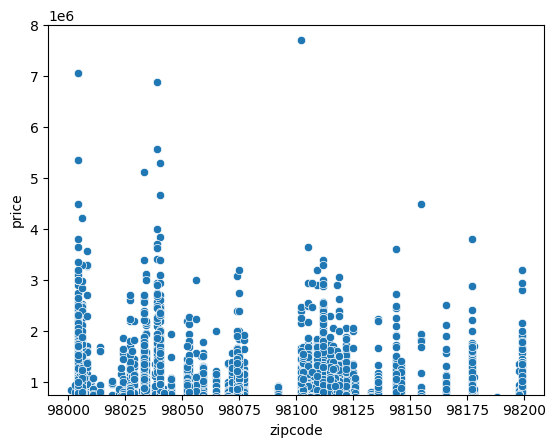

In [75]:
sns.scatterplot(data= house, y= 'price',x='zipcode')
plt.ylim(750000, 8000000)

<Axes: xlabel='yr_built', ylabel='price'>

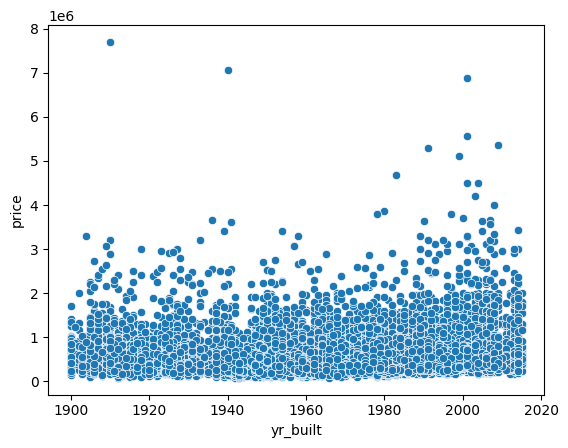

In [76]:
sns.scatterplot(data= house, y= 'price',x='yr_built')

Dataset desciption showed, 75 percentile of the price are within 750000

In [77]:
house1 = house[house['price']<=750000]
house2 = house[house['price']>750000]

<Axes: xlabel='long', ylabel='lat'>

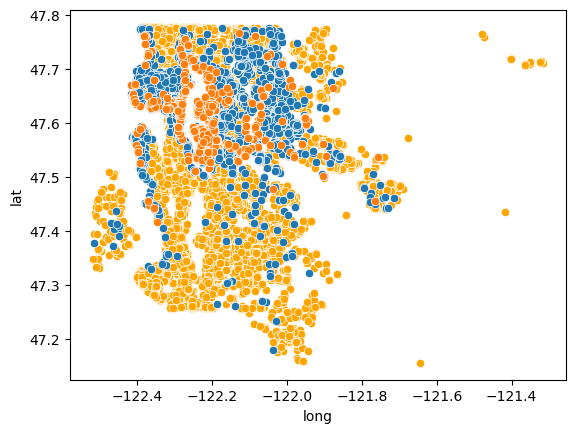

In [78]:
sns.scatterplot(data = house1, y= 'lat',x='long',color = 'orange')
sns.scatterplot(data = house2, y= 'lat',x='long')
sns.scatterplot(data = house[house['price']>1500000], y= 'lat',x='long')

Data cleaning, dropping extrme outlier with 33 bedrooms. Drop house with extrem pricing, which are also the biggest 3 influenser.

In [79]:
house.drop(house[house['bedrooms']>30].index, inplace=True)

In [80]:
house.drop(house[house['price']>6000000].index, inplace=True)

In [81]:
house.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160900e+04,21609,2.160900e+04,21609.000000,21609.000000,21609.000000,2.160900e+04,21609.000000,21609.000000,21609.000000,...,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000,21609.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.579845e+09,NaN,5.391567e+05,3.369152,2.114131,2078.729835,1.510503e+04,1.494239,0.007497,0.233930,...,7.656254,1787.511592,291.218242,1971.009117,84.233329,98077.942755,47.560036,-122.213885,1986.284372,12767.039335
std,2.876363e+09,NaN,3.586107e+05,0.907624,0.768062,912.865312,4.142379e+04,0.539963,0.086261,0.765633,...,1.174214,824.491246,441.827165,29.371277,401.295237,53.506436,0.138571,0.140837,684.963532,27305.741219
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.215000e+05,3.000000,1.750000,1425.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470900,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Data exploratory the distribution of price and other potential valus, looking for similarities of data distribution. 

<Axes: xlabel='price', ylabel='Count'>

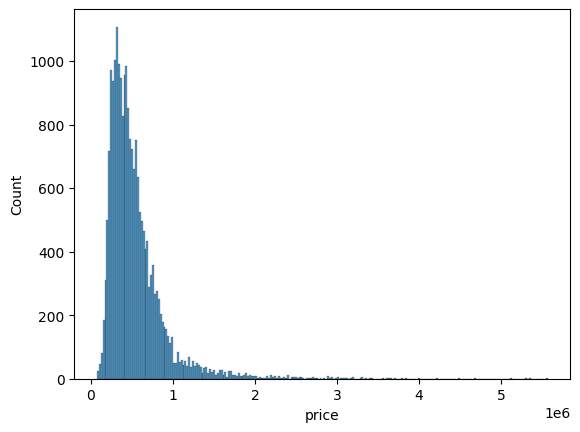

In [82]:
sns.histplot(house['price'])

<Axes: xlabel='sqft_lot', ylabel='Count'>

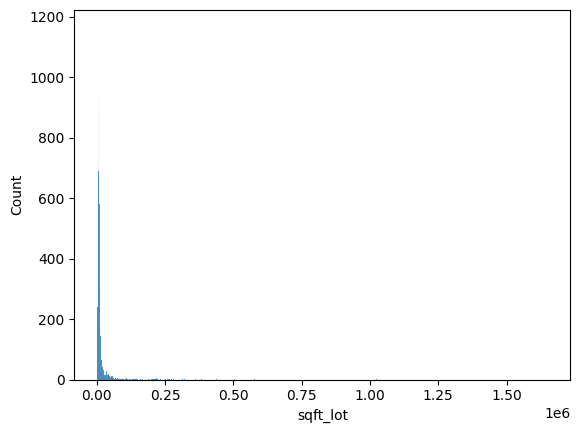

In [83]:
sns.histplot(house['sqft_lot'])


<Axes: xlabel='sqft_living', ylabel='Count'>

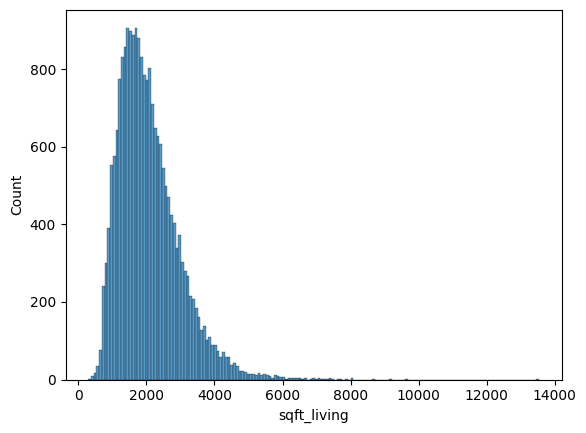

In [84]:
sns.histplot(house['sqft_living'])

<Axes: xlabel='bedrooms', ylabel='Count'>

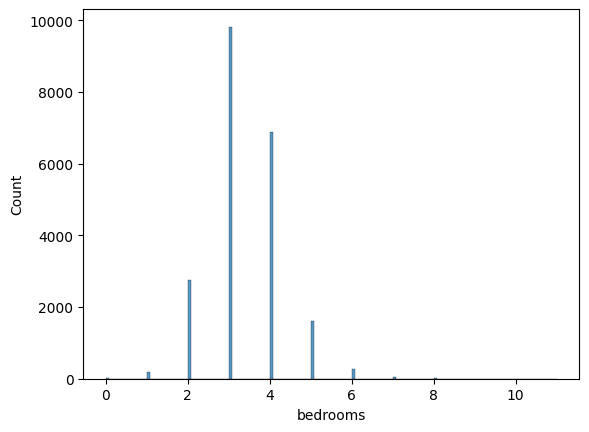

In [85]:
sns.histplot(house['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

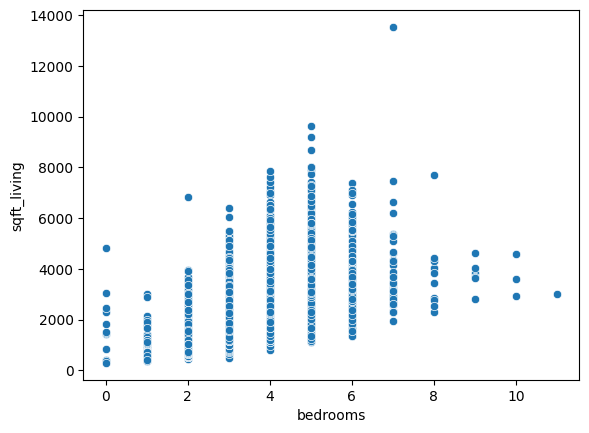

In [86]:
sns.scatterplot(data= house, y= 'sqft_living',x='bedrooms')

<Axes: xlabel='bedrooms', ylabel='price'>

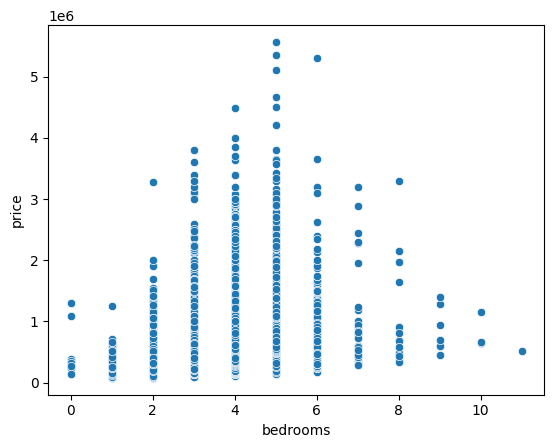

In [87]:
sns.scatterplot(data= house, y= 'price',x='bedrooms')

<Axes: xlabel='grade', ylabel='price'>

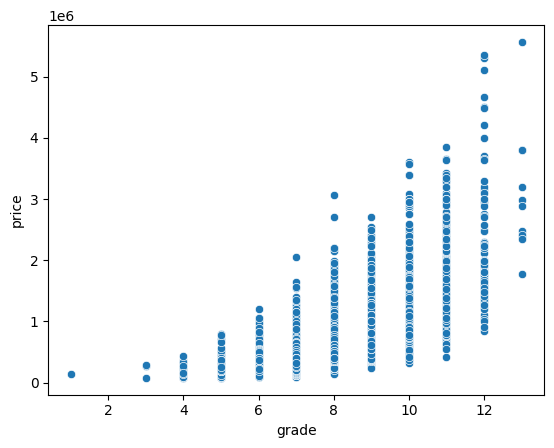

In [88]:
sns.scatterplot(data= house, y= 'price',x='grade')

<Axes: xlabel='condition', ylabel='price'>

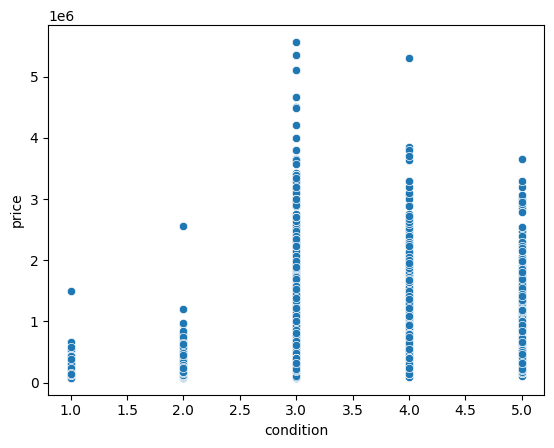

In [89]:
sns.scatterplot(data= house, y= 'price',x='condition')

In [90]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21609 non-null  int64  
 1   date           21609 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21609 non-null  int64  
 4   bathrooms      21609 non-null  float64
 5   sqft_living    21609 non-null  int64  
 6   sqft_lot       21609 non-null  int64  
 7   floors         21609 non-null  float64
 8   waterfront     21609 non-null  int64  
 9   view           21609 non-null  int64  
 10  condition      21609 non-null  int64  
 11  grade          21609 non-null  int64  
 12  sqft_above     21609 non-null  int64  
 13  sqft_basement  21609 non-null  int64  
 14  yr_built       21609 non-null  int64  
 15  yr_renovated   21609 non-null  int64  
 16  zipcode        21609 non-null  int64  
 17  lat            21609 non-null  float64
 18  long       

Feature Engineering by create dummy variable for properties thats been renovated. And category property by their latitude.

In [91]:
def renov(x):
    if x > 0 :
        return 1
    else:
        return 0

In [92]:
house['renovated'] = house['yr_renovated'].apply(renov)

In [93]:
def lat_rank(x):
    if x > 47.5 :
        return 1
    else:
        return 0

In [94]:
house['lat_dummy'] = house['lat'].apply(lat_rank)

Run linear regression models to predict the house price. Calculate each models' mean square error. 

In [95]:
results = ols("price ~ sqft_living +grade+ bedrooms + waterfront + lat_dummy", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     8510.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:04:16   Log-Likelihood:            -2.9528e+05
No. Observations:               21609   AIC:                         5.906e+05
Df Residuals:                   21603   BIC:                         5.906e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -5.23e+05   1.26e+04    -41.607      

In [96]:
house_df = house[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','zipcode','lat','long','sqft_living15','sqft_lot15']]

In [97]:
scaler = StandardScaler()
df_std = scaler.fit_transform(house_df)
pca = PCA()
df_pca = pca.fit_transform(df_std)
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(house_df.columns))])
print('Explained variance ratio:', pca.explained_variance_ratio_)
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)
df_pca.head()

Explained variance ratio: [0.30716553 0.13558315 0.10746998 0.08185864 0.07493072 0.06055376
 0.04611029 0.04356741 0.03370104 0.02785385 0.0215431  0.01903125
 0.01699927 0.01464639 0.00898563]
Cumulative explained variance ratio: [0.30716553 0.44274868 0.55021867 0.63207731 0.70700802 0.76756178
 0.81367207 0.85723949 0.89094052 0.91879438 0.94033747 0.95936872
 0.97636798 0.99101437 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-2.602324,-0.476901,0.326460,0.624011,0.324679,0.526609,-0.916465,-0.072650,0.125414,-1.040947,-0.088075,0.429824,-0.429095,-0.436805,-0.062158
1,-0.256877,-1.206649,-0.283886,1.480387,0.171940,0.028918,0.299598,0.428472,-0.152768,0.086570,0.128399,-0.187427,0.080617,0.595148,0.755116
2,-2.177921,0.516139,0.073144,0.308585,0.369338,-2.116902,-0.798948,-0.347641,0.139965,0.302205,-1.033863,-0.523749,1.336452,0.839881,-0.244121
3,-0.791907,-1.161621,0.653612,-1.029095,-2.160400,1.459709,0.899126,0.410313,0.172617,-0.113338,1.163402,-0.346804,0.086377,0.091591,-0.414686
4,-0.416834,0.474150,-0.355561,0.098529,0.207749,-1.170271,-0.736816,0.087135,-0.004506,-0.439414,0.648612,0.150817,-0.258940,-0.536446,-0.259050


In [98]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,lat_dummy
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0,1
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0,1
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0,1
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0,1


In [99]:
pred_vals = results.predict(house[['sqft_living','grade', 'bedrooms','waterfront','lat_dummy','yr_built']])

In [100]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']], axis=1)

In [101]:
res

,y_hat,price
0,386107.753944,221900.0
1,662560.741231,538000.0
2,257418.484716,180000.0
3,513017.279039,604000.0
4,560919.223933,510000.0
...,...,...
21608,531086.167751,360000.0
21609,657995.692846,400000.0
21610,382508.194402,402101.0
21611,545008.260636,400000.0


<Axes: xlabel='price', ylabel='y_hat'>

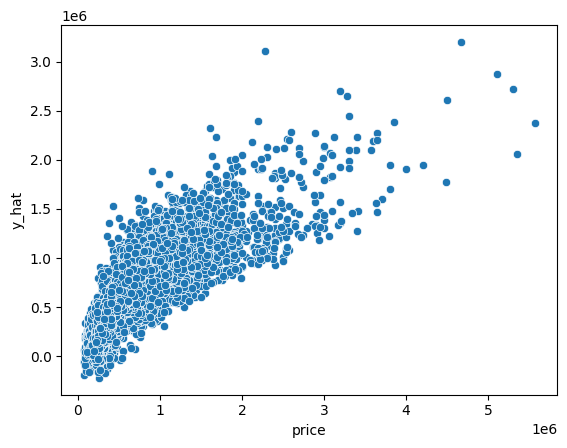

In [102]:
sns.scatterplot(data=res, x='price', y='y_hat')

In [103]:
res['error'] = res['y_hat'] - res['price']

In [104]:
res.head(1)

,y_hat,price,error
0,386107.753944,221900.0,164207.753944


In [105]:
res['sq_error'] = res['error']**2

In [106]:
ols_mse= np.sqrt(res['sq_error'].mean())
ols_mse

208095.40061279727

(array([2.0000e+00, 2.0000e+00, 8.0000e+00, 1.9000e+01, 7.5000e+01,
        1.9500e+02, 1.4520e+03, 1.8327e+04, 1.5080e+03, 2.1000e+01]),
 array([-3287087.61217187, -2848273.58680371, -2409459.56143555,
        -1970645.53606738, -1531831.51069922, -1093017.48533106,
         -654203.45996289,  -215389.43459473,   223424.59077343,
          662238.6161416 ,  1101052.64150976]),
 <BarContainer object of 10 artists>)

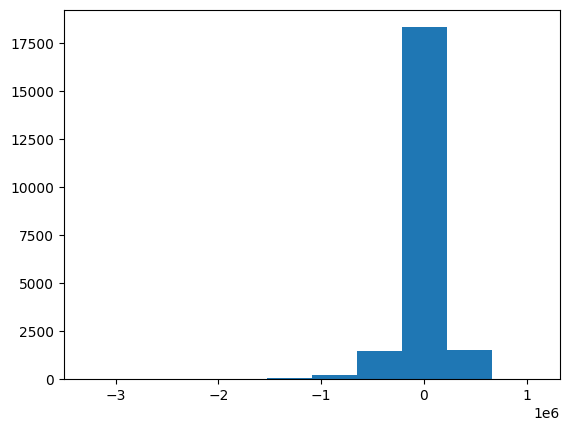

In [107]:
plt.hist(res['error'])

(array([1.5786e+04, 4.7700e+03, 7.1900e+02, 1.9200e+02, 7.8000e+01,
        4.1000e+01, 1.4000e+01, 2.0000e+00, 3.0000e+00, 4.0000e+00]),
 array([  75000.,  624500., 1174000., 1723500., 2273000., 2822500.,
        3372000., 3921500., 4471000., 5020500., 5570000.]),
 <BarContainer object of 10 artists>)

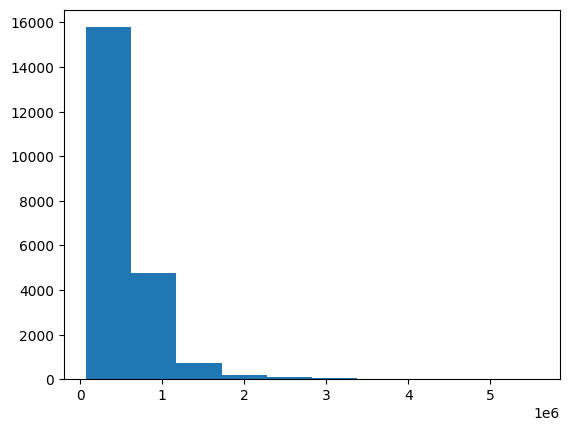

In [108]:
plt.hist(house['price'])

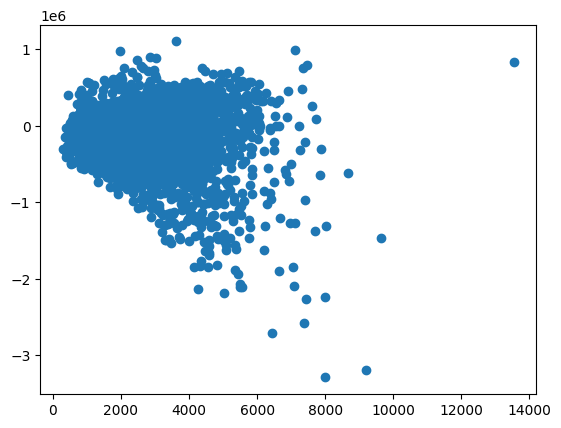

In [109]:
plt.scatter(house['sqft_living'],res['error'])

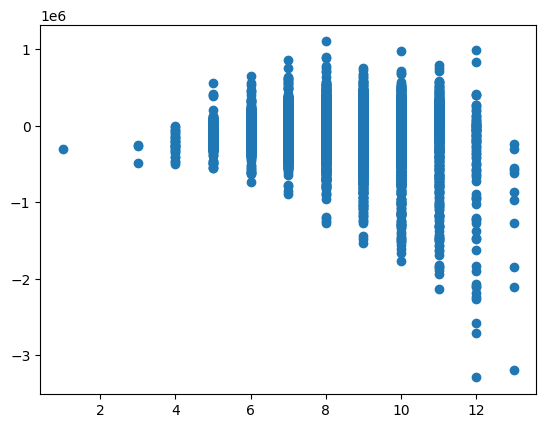

In [110]:
plt.scatter(house['grade'],res['error'])

((array([-3.99699175, -3.78176629, -3.66403588, ...,  3.66403588,
          3.78176629,  3.99699175]),
  array([-3287087.61217187, -3193055.2133334 , -2710117.89982574, ...,
           972602.66309489,   987891.79155994,  1101052.64150976])),
 (187423.83114973825, -3.606237938162579e-09, 0.9005026677278868))

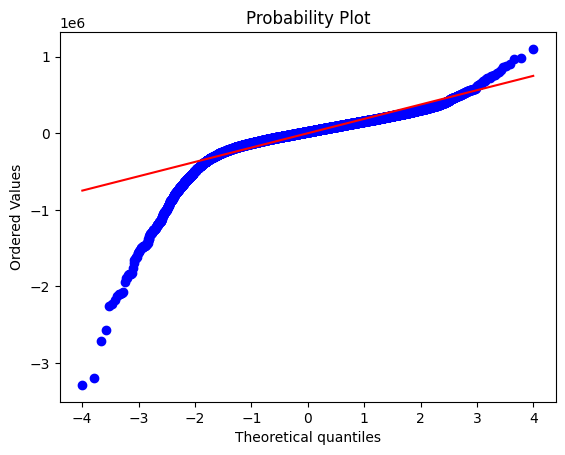

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [112]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_sqft_living  dfb_grade  dfb_bedrooms   
0           0.000210         0.004598  -0.001211     -0.001645  \
1          -0.007134        -0.007802   0.007231      0.004646   
2          -0.003267        -0.000071   0.001906      0.002203   
3           0.000902        -0.000083  -0.002021      0.002638   
4           0.000983         0.001389  -0.001426      0.000005   
...              ...              ...        ...           ...   
21608       0.004385         0.006342  -0.006001     -0.000858   
21609       0.003723         0.002574  -0.001416     -0.006190   
21610       0.000267        -0.000287   0.000152     -0.000589   
21611       0.003289         0.004713  -0.004608     -0.000382   
21612      -0.000784         0.000843  -0.000448      0.001729   

       dfb_waterfront  dfb_lat_dummy       cooks_d  standard_resid  hat_diag   
0           -0.000268      -0.003927  1.281196e-05       -0.789038  0.000123  \
1            0.000845      -0.003301  1.549048e

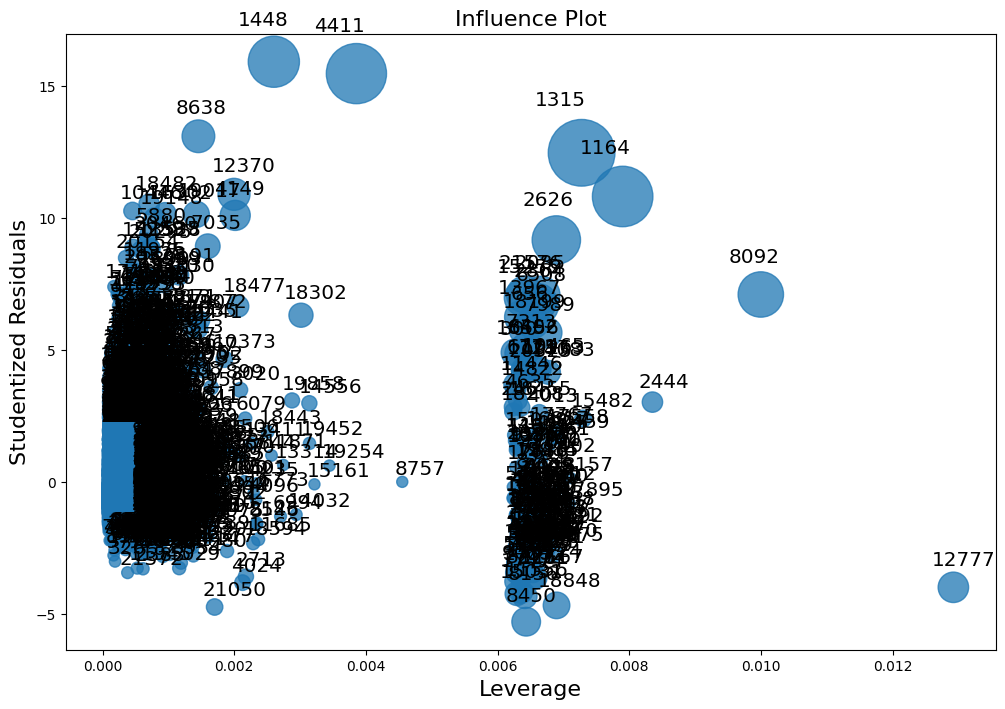

In [113]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [114]:
categorical_features = ['lat_dummy']
numerical_features = ['sqft_living','grade', 'bedrooms','waterfront']
target = 'price'

In [115]:
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [116]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [117]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [118]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [119]:
linear_regression.fit(X_train, y_train)
pred = linear_regression.predict(X_test)
linear_mse = np.sqrt(mean_squared_error(pred,y_test))
linear_mse

200805.65800650686

In [120]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=10.0))
])

In [121]:
ridge_regression.fit(X_train, y_train)
pred_ridge = ridge_regression.predict(X_test)
ridge_mse =np.sqrt(mean_squared_error(pred_ridge,y_test))

In [122]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=5.0))
])

In [123]:
lasso_regression.fit(X_train, y_train)
lasso_pred = lasso_regression.predict(X_test)
lasso_mse = np.sqrt(mean_squared_error(lasso_pred, y_test))

In [124]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['lat_dummy']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living', 'grade',
                                                   'bedrooms',
                                                   'waterfront'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [125]:
elasticnet_pred = elasticnet_regression.predict(X_test)
elasticnet_mse = np.sqrt(mean_squared_error(elasticnet_pred, y_test))

In [126]:
names=['OLS MSE','Linear regression MSE','Ridge regression MSE','Lasso regression MSE','Elasticnet regression MSE']
values = [ols_mse,linear_mse,ridge_mse,lasso_mse,elasticnet_mse]

In [127]:
data = {'Models MSE': names, 'Value': values}
models_mse = pd.DataFrame(data)
models_mse

,Models MSE,Value
0,OLS MSE,208095.400613
1,Linear regression MSE,200805.658007
2,Ridge regression MSE,200745.367227
3,Lasso regression MSE,200758.007287
4,Elasticnet regression MSE,203776.354837
